In [ ]:
!pip install gradio opencv-python ultralytics
# !pip install pillow numpy tensorflow

SyntaxError: invalid syntax (623176344.py, line 1)

In [2]:
from PIL import Image
import numpy as np
from IPython.display import display
import tensorflow as tf
import gradio as gr



/Users/tianyu/Documents/NEU/2024Fall/CS5330/WasteClassificationipynb/tensorflow_env/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


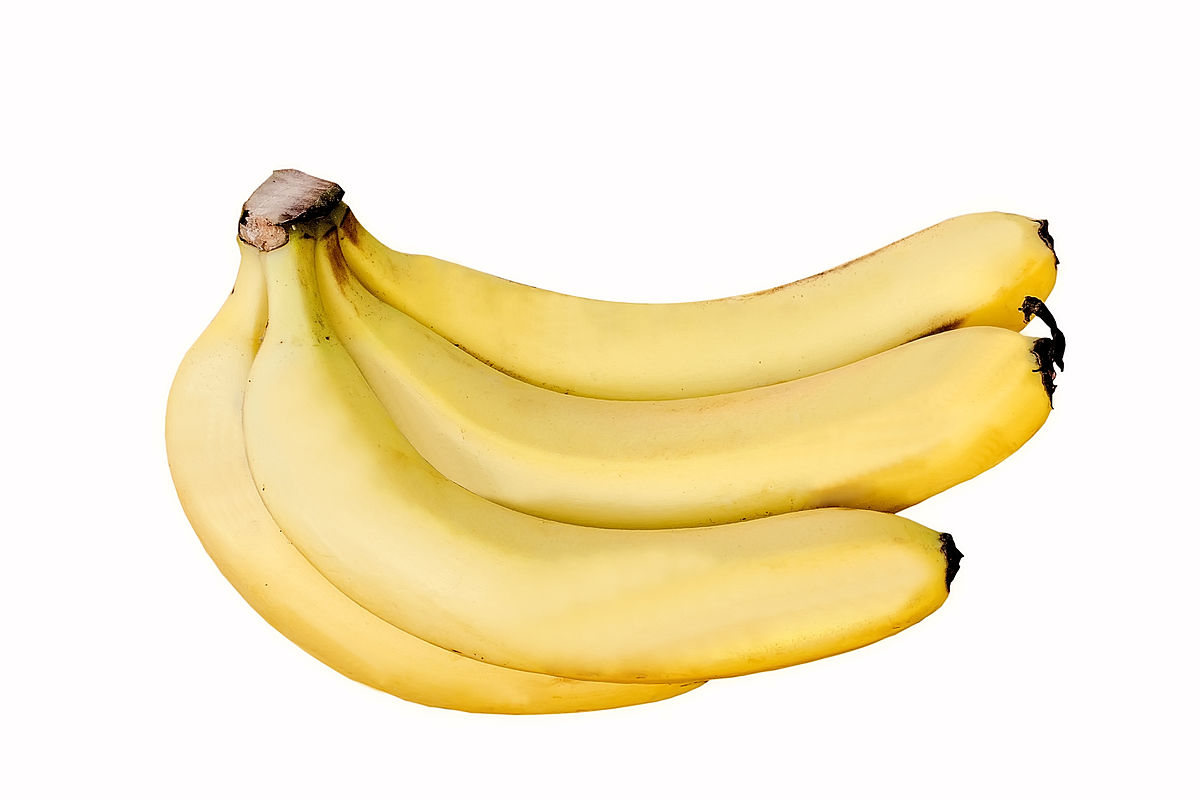

In [3]:
image_path = "img/Banana.jpg"
image = Image.open(image_path)
display(image)

In [4]:


# Load the pre-trained model
model = tf.keras.models.load_model('waste-classification-model.h5')

/Users/tianyu/Documents/NEU/2024Fall/CS5330/WasteClassificationipynb/tensorflow_env/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [5]:
# Resize the image to match the input shape expected by the model
image = image.resize((32, 32))  # Resize to (32, 32)
image_array = np.array(image) / 255.0  # Normalize pixel values to [0, 1]

# Add a batch dimension (the model expects input shape (None, 32, 32, 3))
input_data = np.expand_dims(image_array, axis=0)

# Predict the waste type
predictions = model.predict(input_data)
class_index = np.argmax(predictions)

# Define class labels
class_labels = ["Cardboard", "Glass", "Metal", "Paper", "Plastic", "Trash"]

# Output the prediction result
print(f"Predicted Class: {class_labels[class_index]}")
print(f"Confidence: {predictions[0][class_index]:.2f}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
Predicted Class: Paper
Confidence: 1.00


## Gradio for Waste Classification

In [6]:
# Function to classify the uploaded image
def classify_image(image):
    # Convert the PIL image to a NumPy array
    image = image.resize((32, 32))  # Resize to match model input shape
    image_array = np.array(image) / 255.0  # Normalize pixel values to [0, 1]
    input_data = np.expand_dims(image_array, axis=0)  # Add batch dimension
    
    # Predict the waste type
    predictions = model.predict(input_data)
    class_index = np.argmax(predictions)
    confidence = predictions[0][class_index]
    
    # Return the class label and confidence
    return f"Predicted Class: {class_labels[class_index]} ({confidence:.2f})"

# Gradio Interface
interface = gr.Interface(
    fn=classify_image,  # Function to call for predictions
    inputs=gr.Image(type="pil"),  # Input is an image (PIL format)
    outputs="text",  # Output is text
    title="Waste Classification",  # Title for the Gradio app
    description="Upload an image of waste to classify it as Cardboard, Glass, Metal, Paper, Plastic, or Trash."
)

# Launch the Gradio app
interface.launch()


* Running on local URL:  http://127.0.0.1:7860

To create a public link, set `share=True` in `launch()`.
